### Task 0 - Data ingestion
We load the Sakila dataset into DuckDB using the provided ETL script, and then verify that the tables were loaded correctly by sampling rows from the film table.



In [111]:
!uv run load_sakila_sqlite_duckdb.py

Pipeline sakila_sqlite_duckdb load step completed in 2.87 seconds
1 load package(s) were loaded to destination duckdb and into dataset staging
The duckdb destination used duckdb:////Users/hazajijan/MLOPS/databashantering/sakila_lab_haza_jijan/data/sakila.duckdb location to store data
Load package 1764837509.122491 is LOADED and contains no failed jobs


In [112]:
from pathlib import Path
import duckdb 

duckdb_path = "data/sakila.duckdb"

with duckdb.connect(duckdb_path) as conn:
    films = conn.sql("from staging.film;").df()

films.sample(5)


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,_dlt_load_id,_dlt_id
504,505,LABYRINTH LEAGUE,A Awe-Inspiring Saga of a Composer And a Frisb...,2006,1,<NA>,6,2.99,46,24.99,PG-13,"Commentaries,Behind the Scenes",2021-03-06 15:52:04,1764837509.122491,qOEuJslEouul4A
594,595,MOON BUNCH,A Beautiful Tale of a Astronaut And a Mad Cow ...,2006,1,<NA>,7,0.99,83,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:05,1764837509.122491,vYHCmljYLaCHZA
491,492,JUNGLE CLOSER,A Boring Character Study of a Boy And a Woman ...,2006,1,<NA>,6,0.99,134,11.99,NC-17,"Trailers,Commentaries,Deleted Scenes",2021-03-06 15:52:04,1764837509.122491,B1gBkMM2LTAf6A
111,112,CALENDAR GUNFIGHT,A Thrilling Drama of a Frisbee And a Lumberjac...,2006,1,<NA>,4,4.99,120,22.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:01,1764837509.122491,7waGSic0rzsfxg
972,973,WIFE TURN,A Awe-Inspiring Epistle of a Teacher And a Fem...,2006,1,<NA>,3,4.99,183,27.99,NC-17,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:08,1764837509.122491,rllSPjKW6pRuLQ


### Function for SQL queries 
To simplify running SQL in the notebook, a helper function query_sakila() is created. It opens a DuckDB connection, executes a SQL query, and returns the result as a pandas DataFrame.

In [113]:
def query_sakila(query: str, duckdb_path="data/sakila.duckdb"):
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query=query).df()

    return df

### Task 1 - EDA in python
The Manager would like you to explore the data and analyze the questions below. He wants you to make it in
jupyter notebook so that the team can directly see the results of your EDA. Combine duckdb and pandas to
do the EDA.
It's important that you show the answers, i.e. run your cells with outputs directly in the notebook.

#### a) Which movies are longer than 3 hours (180 minutes), show the title and its length?
Here I select all films with a length greater than 180 minutes and show their titles and lengths.


In [114]:
query_sakila ("""
SELECT title, length
FROM films
WHERE length > 180
ORDER BY length DESC
LIMIT 10;
""")

,title,length
0,DARN FORRESTER,185
1,GANGS PRIDE,185
2,CONTROL ANTHEM,185
3,POND SEATTLE,185
4,MUSCLE BRIGHT,185
5,SOLDIERS EVOLUTION,185
6,HOME PITY,185
7,SWEET BROTHERHOOD,185
8,CHICAGO NORTH,185
9,WORST BANGER,185


#### b) Which movies have the word "love" in its title? Show the following columns
- title
- rating
- length
- description

Here I filter all movies where the title contains the word “love” and display the title, rating, length, and description.


In [115]:
query_sakila("""
SELECT 
    title,
    rating,
    length,
    description
FROM films
WHERE LOWER(title) LIKE '%love%';
""")

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


#### c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length
Here I calculate the shortest, average, median, and longest movie length using SQL aggregate functions.



In [116]:
query_sakila("""
SELECT
    MIN(length) AS shortest,
    AVG(length) AS average,
    MEDIAN(length) AS median,
    MAX(length) AS longest
FROM films;
""")

,shortest,average,median,longest
0,46,115.272,114.0,185


#### d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can keep the movie. The Manager wants to know the 10 most expensive movies to rent per day

Here I calculate the daily rental price by dividing rental_rate by rental_duration, and list the 10 most expensive films per day.


In [117]:
query_sakila("""
SELECT
    title,
    rental_rate,
    rental_duration,
    rental_rate / rental_duration AS price_per_day
FROM films
ORDER BY price_per_day DESC
LIMIT 10;
""")


,title,rental_rate,rental_duration,price_per_day
0,BACKLASH UNDEFEATED,4.99,3,1.663333
1,BILKO ANONYMOUS,4.99,3,1.663333
2,BEAST HUNCHBACK,4.99,3,1.663333
3,AUTUMN CROW,4.99,3,1.663333
4,ACE GOLDFINGER,4.99,3,1.663333
5,CARIBBEAN LIBERTY,4.99,3,1.663333
6,BEHAVIOR RUNAWAY,4.99,3,1.663333
7,CASPER DRAGONFLY,4.99,3,1.663333
8,AMERICAN CIRCUS,4.99,3,1.663333
9,CASUALTIES ENCINO,4.99,3,1.663333


### e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have played in.
This query counts how many movies each actor has appeared in by joining `actor` and `film_actor`. The result is sorted to show the actors with the highest number of movie appearances.


In [118]:
query_sakila("""
SELECT
    a.actor_id,
    a.first_name,
    a.last_name,
    COUNT(fa.film_id) AS num_movies
FROM staging.actor AS a
JOIN staging.film_actor AS fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY num_movies DESC
LIMIT 10;
""")

,actor_id,first_name,last_name,num_movies
0,107.0,GINA,DEGENERES,42
1,102.0,WALTER,TORN,41
2,198.0,MARY,KEITEL,40
3,181.0,MATTHEW,CARREY,39
4,23.0,SANDRA,KILMER,37
5,81.0,SCARLETT,DAMON,36
6,106.0,GROUCHO,DUNST,35
7,37.0,VAL,BOLGER,35
8,144.0,ANGELA,WITHERSPOON,35
9,158.0,VIVIEN,BASINGER,35


#### f) Now it's time for you to choose your own question to explore the sakila database! Write down 3-5 questions you want to answer and then answer them using pandas and duckdb

#### Question 1
#### Which customers have rented the most movies?

This query joins `customer` -> `rental` and counts the number of rentals per customer.  
The result shows the top 10 customers with the highest rental activity.

In [119]:
query_sakila("""
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    COUNT(r.rental_id) AS num_rentals
FROM staging.customer c
JOIN staging.rental r
    ON c.customer_id = r.customer_id
GROUP BY 
    c.customer_id, 
    c.first_name, 
    c.last_name
ORDER BY num_rentals DESC
LIMIT 10;
""")

,customer_id,first_name,last_name,num_rentals
0,148,ELEANOR,HUNT,46
1,526,KARL,SEAL,45
2,236,MARCIA,DEAN,42
3,144,CLARA,SHAW,42
4,75,TAMMY,SANDERS,41
5,197,SUE,PETERS,40
6,469,WESLEY,BULL,40
7,137,RHONDA,KENNEDY,39
8,178,MARION,SNYDER,39
9,468,TIM,CARY,39


#### Question 2 (Follow-up question)

#### Which customers have spent the most money?

This follow-up question builds on Question 1. After identifying which customers rent the most movies, we now explore which customers generate the highest revenue.

This query joins `customer` -> `rental` ->`payment` and calculates the total amount spent by each customer.  
The result shows the top 10 highest-spending customers.

In [120]:
query_sakila("""
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    SUM(p.amount) AS total_spent
FROM staging.customer c
JOIN staging.rental r ON c.customer_id = r.customer_id
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY 
    c.customer_id, 
    c.first_name, 
    c.last_name
ORDER BY total_spent DESC
LIMIT 10;
""")


,customer_id,first_name,last_name,total_spent
0,526,KARL,SEAL,221.55
1,148,ELEANOR,HUNT,216.54
2,144,CLARA,SHAW,195.58
3,137,RHONDA,KENNEDY,194.61
4,178,MARION,SNYDER,194.61
5,459,TOMMY,COLLAZO,186.62
6,469,WESLEY,BULL,177.60
7,468,TIM,CARY,175.61
8,236,MARCIA,DEAN,175.58
9,181,ANA,BRADLEY,174.66


#### Question 3

#### Which cities generate the most rentals?

This question identifies which city rents the most films.

This query joins `city` -> `address` -> `customer` -> `rental`  and counts how many rentals each city generates.  
The result shows the top 10 cities with the highest rental activity.

In [121]:
query_sakila("""
SELECT
    ci.city,
    COUNT(r.rental_id) AS num_rentals
FROM staging.city ci
JOIN staging.address a ON ci.city_id = a.city_id
JOIN staging.customer c ON a.address_id = c.address_id
JOIN staging.rental r ON c.customer_id = r.customer_id
GROUP BY ci.city
ORDER BY num_rentals DESC
LIMIT 10;
""")


,city,num_rentals
0,Aurora,50
1,London,48
2,Saint-Denis,46
3,Cape Coral,45
4,Tanza,42
5,Molodetno,42
6,Changhwa,41
7,Ourense (Orense),40
8,Changzhou,40
9,Apeldoorn,39


### Question 4  

Which films have been rented the most?

This question identifies the most popular films based on total rental activity.
We join  
`film` -> `inventory` -> `rental`  
and count how many times each film has been rented. The result shows the top 10 most rented films.


In [127]:
query_sakila("""
SELECT 
    f.film_id,
    f.title,
    COUNT(r.rental_id) AS num_rentals
FROM staging.film f
JOIN staging.inventory i 
    ON f.film_id = i.film_id
JOIN staging.rental r 
    ON i.inventory_id = r.inventory_id
GROUP BY f.film_id, f.title
ORDER BY num_rentals DESC
LIMIT 5;
""")


,film_id,title,num_rentals
0,103,BUCKET BROTHERHOOD,34
1,738,ROCKETEER MOTHER,33
2,767,SCALAWAG DUCK,32
3,382,GRIT CLOCKWORK,32
4,489,JUGGLER HARDLY,32


### Task 2 - Graphs

#### a) Who are our top 5 customers by total spend? The Manager wants to know so that they can reward them with special offers. Create a bar chart showing the top 5 customers by total spend.
This chart visualizes the five customers who have spent the most money.  
The data is based on customer ->  `rental`  ->  `payment`  and helps the manager identify the most valuable customers.

In [122]:
top_spenders = query_sakila("""
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    SUM(p.amount) AS total_spent
FROM staging.customer c
JOIN staging.rental r ON c.customer_id = r.customer_id
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY 
    c.customer_id, 
    c.first_name, 
    c.last_name
ORDER BY total_spent DESC
LIMIT 5;
""")

top_spenders


,customer_id,first_name,last_name,total_spent
0,526,KARL,SEAL,221.55
1,148,ELEANOR,HUNT,216.54
2,144,CLARA,SHAW,195.58
3,178,MARION,SNYDER,194.61
4,137,RHONDA,KENNEDY,194.61


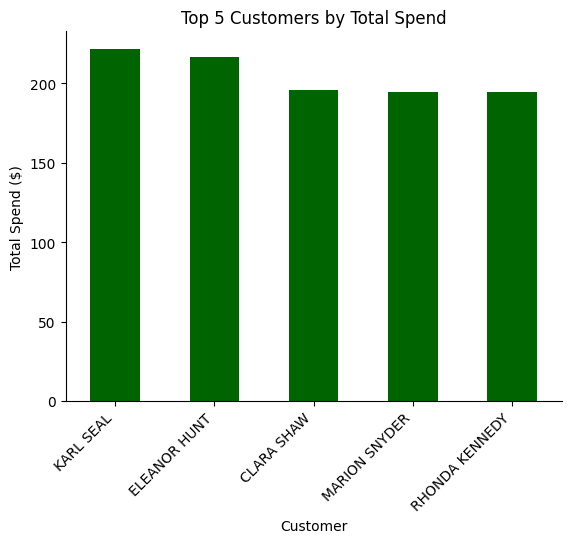

In [133]:
import matplotlib.pyplot as plt

# Add full name column
top_spenders["name"] = top_spenders["first_name"] + " " + top_spenders["last_name"]

# Plot bar chart
ax = top_spenders.plot(
    x="name",
    y="total_spent",
    kind="bar",
    color="darkgreen",
    xlabel="Customer",
    ylabel="Total Spend ($)",
    title="Top 5 Customers by Total Spend",
    legend=False
)


# Remove top and right borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Rorare top right borders
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

#### b) How much money does each film category bring in? Make a bar chart showing total revenue per film category.

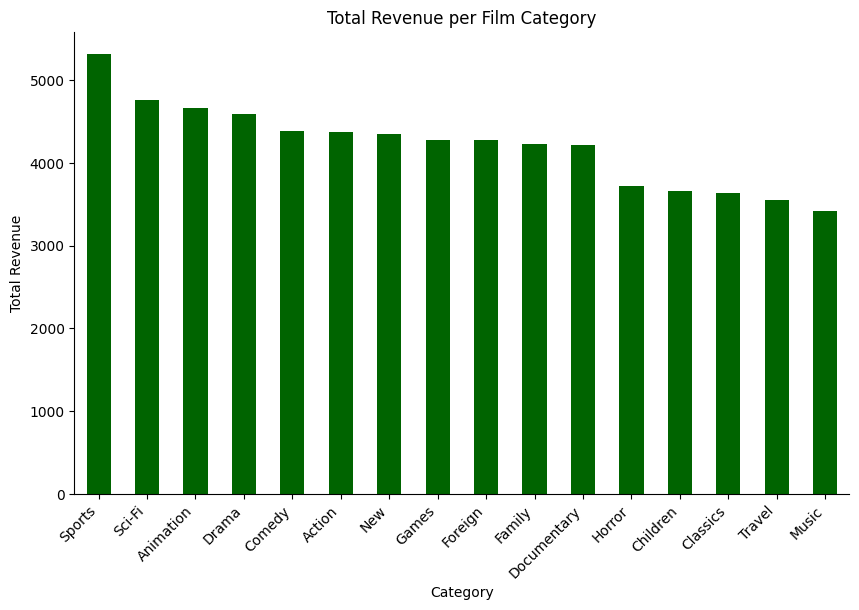

In [138]:

# SQL: total revenue per film category
category_revenue = query_sakila("""
SELECT 
    cat.name AS category,
    SUM(p.amount) AS total_revenue
FROM staging.category cat
JOIN staging.film_category fc ON cat.category_id = fc.category_id
JOIN staging.film f ON fc.film_id = f.film_id
JOIN staging.inventory i ON f.film_id = i.film_id
JOIN staging.rental r ON i.inventory_id = r.inventory_id
JOIN staging.payment p ON r.rental_id = p.rental_id
GROUP BY cat.name
ORDER BY total_revenue DESC;
""")

# Plot bar chart 
ax = category_revenue.plot(
    x="category",
    y="total_revenue",
    kind="bar",
    color="darkgreen",
    xlabel="Category",
    ylabel="Total Revenue",
    title="Total Revenue per Film Category",
    legend=False,
    figsize=(10, 6)
)

# Remove top and right borders 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
